# **Data Loading**

In [1]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi data tabular
import numpy as np  # Mengimpor pustaka numpy untuk operasi numerik
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi data
import seaborn as sns  # Mengimpor pustaka seaborn untuk visualisasi statistik yang lebih menarik
import scipy  # Mengimpor pustaka scipy untuk komputasi ilmiah (misalnya statistik dan optimisasi)
import sklearn  # Mengimpor pustaka scikit-learn, digunakan untuk machine learning
import zipfile  # Mengimpor pustaka zipfile untuk mengekstrak file ZIP
from tqdm import tqdm  # Mengimpor tqdm untuk menampilkan progress bar dalam loop
import os  # Mengimpor pustaka os untuk operasi sistem file (seperti mengakses path dan direktori)

from sklearn.preprocessing import OneHotEncoder  # Mengimpor OneHotEncoder untuk mengubah data kategori menjadi format numerik biner
from sklearn.decomposition import PCA  # Mengimpor PCA untuk reduksi dimensi
from sklearn.model_selection import train_test_split  # Mengimpor fungsi untuk membagi dataset menjadi data latih dan data uji
from sklearn.preprocessing import StandardScaler  # Mengimpor StandardScaler untuk menstandarisasi fitur (mean=0, std=1)
from sklearn.neighbors import KNeighborsRegressor  # Mengimpor KNN Regressor, algoritma regresi berbasis tetangga terdekat
from sklearn.metrics import mean_squared_error  # Mengimpor fungsi untuk menghitung error kuadrat rata-rata
from sklearn.ensemble import RandomForestRegressor  # Mengimpor model Random Forest untuk regresi
from sklearn.ensemble import AdaBoostRegressor  # Mengimpor model AdaBoost untuk regresi


In [2]:
os.environ["KAGGLE_USERNAME"] = "lailadwi"  # Menetapkan username akun Kaggle ke dalam variabel lingkungan
os.environ["KAGGLE_KEY"] = "38b6f4db478283c0faf8346179833ec3"  # Menetapkan API key akun Kaggle ke dalam variabel lingkungan


In [3]:
!kaggle datasets download -d csafrit2/maternal-health-risk-data

Dataset URL: https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data
License(s): other


In [4]:
!unzip maternal-health-risk-data.zip

Archive:  maternal-health-risk-data.zip
  inflating: Maternal Health Risk Data Set.csv  


In [19]:
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')  # Membaca file CSV dan menyimpannya ke dalam DataFrame bernama df
df.head()  # Menampilkan 5 baris pertama dari DataFrame untuk melihat isi dan struktur data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
df.shape  # Mengembalikan ukuran DataFrame dalam bentuk tuple (jumlah baris, jumlah kolom)

(1014, 7)

Output kode di atas memberikan informasi sebagai berikut:

Ada 1014 baris records dalam dataset.
Terdapat 7 kolom yaitu: Age	SystolicBP	DiastolicBP	BS	BodyTemp	HeartRate	RiskLevel

# **Exploratory Data Analysis**

## Deskripsi Variabel

Attribute  | Keterangan
------------- | -------------
Sumber | https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data
Age | Usia dalam tahun saat seorang wanita hamil.
SystolicBP | Nilai atas Tekanan Darah dalam mmHg, atribut penting lainnya selama kehamilan.
DiastolicBP | Nilai Tekanan Darah yang lebih rendah dalam mmHg, atribut penting lainnya selama kehamilan.
BS | Kadar glukosa darah dalam konsentrasi molar, mmol/L.
HeartRate | Denyut jantung normal saat istirahat dalam denyut per menit.
Risk Level | Tingkat Intensitas Risiko yang diprediksi selama kehamilan dengan mempertimbangkan atribut sebelumnya.

In [7]:
df.info()  # Menampilkan ringkasan informasi tentang DataFrame, termasuk jumlah entri, nama kolom, jumlah non-null, dan tipe data tiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Dari output terlihat bahwa:
- Terdapat 1 kolom dengan tipe object, yaitu:  RiskLevel.
- Terdapat 2 kolom numerik dengan tipe data float64 yaitu:BS,BodyTemp.
- Terdapat 4 kolom numerik dengan tipe data int64, yaitu:Age,SystolicBP,DiastolicBP,HearRate.

In [8]:
df.describe()  # Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## Data Assesing

### Data Duplikat

In [9]:
df.duplicated().sum()  # Menghitung jumlah baris duplikat dalam DataFrame

np.int64(562)

Dari output terlihat bahwa tedapat duplicated pada dataset sejumlah 562 data

In [10]:
df.drop_duplicates(inplace=True)  # Menghapus baris duplikat dari DataFrame dan langsung menyimpan perubahan ke df (tanpa membuat salinan baru)

In [11]:
df.duplicated().sum()  # Menghitung jumlah baris duplikat dalam DataFrame

np.int64(0)

Dari output terihat bahwa duplicated sudah dihapus

### Missing Value

In [12]:
df.isna().sum()  # Menghitung jumlah nilai yang hilang (NaN) di setiap kolom dalam DataFrame

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


###Menangani Outliers

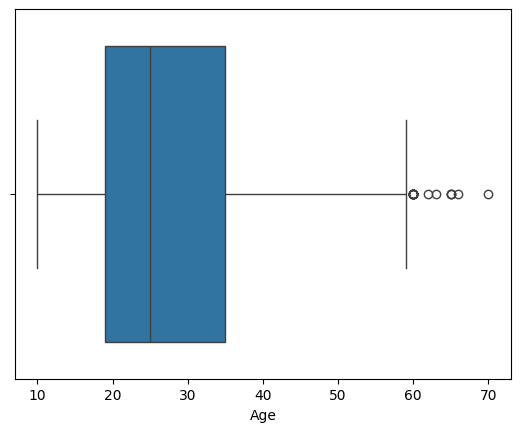

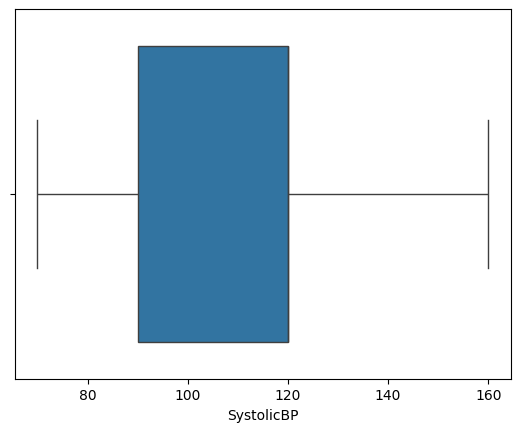

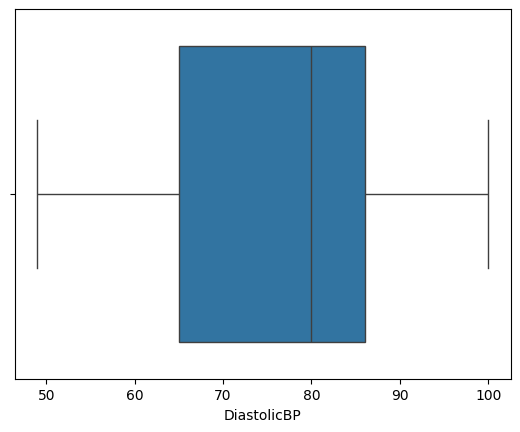

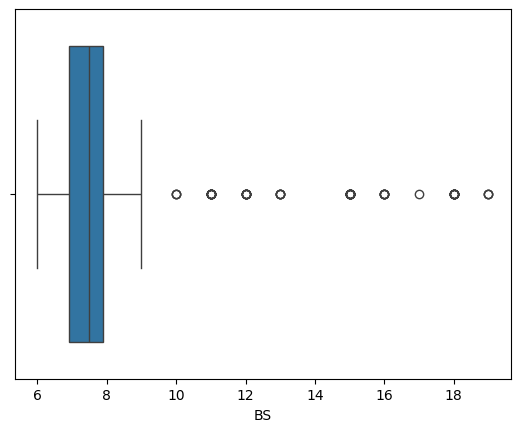

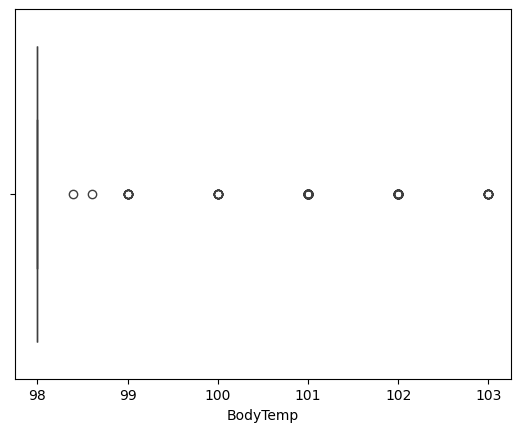

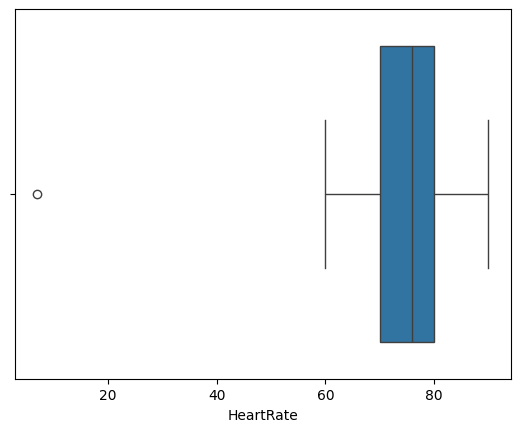

In [13]:
df1 = df.select_dtypes(exclude=['object'])  # Membuat DataFrame baru (df1) hanya dengan kolom numerik, mengecualikan kolom bertipe objek (biasanya string/kategori)
for column in df1:  # Melakukan iterasi untuk setiap kolom numerik dalam df1
    plt.figure()  # Membuat figure baru untuk setiap plot agar tidak menumpuk
    sns.boxplot(data=df1, x=column)  # Membuat boxplot untuk mendeteksi outlier pada masing-masing kolom

Beberapa pengamatan dalam satu set data kadang berada di luar lingkungan pengamatan lainnya. Pengamatan seperti itu disebut outlier.

Ada beberapa teknik untuk menangani outliers, antara lain:
- Hypothesis Testing
- Z-score method
- IQR Method

Pada kasus ini, Anda akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, Anda akan menangani outliers dengan teknik IQR method

In [14]:
# Menghapus outlier dari DataFrame berdasarkan metode IQR untuk semua kolom numerik

# 1. Pilih hanya kolom numerik
numerical_housing = df.select_dtypes(include=np.number)

# 2. Hitung kuartil dan IQR (Interquartile Range)
Q1 = numerical_housing.quantile(0.25)  # Kuartil pertama (25%)
Q3 = numerical_housing.quantile(0.75)  # Kuartil ketiga (75%)
IQR = Q3 - Q1  # Rentang interkuartil

# 3. Buat mask boolean: True untuk data yang BUKAN outlier di semua kolom numerik
mask = ~((numerical_housing < (Q1 - 1.5 * IQR)) | (numerical_housing > (Q3 + 1.5 * IQR)))

# 4. Saring DataFrame untuk menghapus baris yang mengandung outlier
df = df[mask.all(axis=1)]

# 5. Tampilkan 5 baris pertama setelah outlier dihapus
print(df.head())


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
3   30         140           85  7.00      98.0         70  high risk
4   35         120           60  6.10      98.0         76   low risk
5   23         140           80  7.01      98.0         70  high risk
6   23         130           70  7.01      98.0         78   mid risk
8   32         120           90  6.90      98.0         70   mid risk


In [15]:
df.shape  # Menampilkan bentuk (dimensi) DataFrame setelah proses penghapusan outlier, dalam format (jumlah_baris, jumlah_

(283, 7)

Dataset Anda sekarang telah bersih dan memiliki 283 sampel.

## Data Analysis

Selanjutnya, lakukan proses analisis data dengan teknik Univariate EDA. Pertama, Anda bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [16]:
categorical_features = ['RiskLevel']  # Menyimpan nama kolom kategorikal (dalam hal ini label target) ke dalam list
numerical_features = ['Age', 'SystolicB', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']  # Menyimpan nama kolom numerik fitur ke dalam list

### Univariate Analysis

Univariate visualization merupakan bentuk visualisasi data yang hanya merepresentasikan informasi yang terdapat pada satu variabel. Jenis visualisasi ini umumnya digunakan untuk memberikan gambaran terkait distribusi sebuah variabel dalam suatu dataset.

### Data Kategori

           Jumlah sampel  Persentase
RiskLevel                           
low risk             194        68.6
mid risk              65        23.0
high risk             24         8.5


<Axes: title={'center': 'RiskLevel'}, xlabel='RiskLevel'>

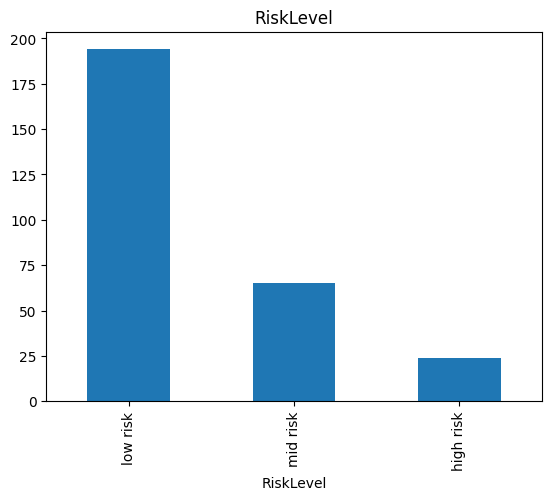

In [17]:
feature = categorical_features[0]  # Mengambil nama kolom kategorikal pertama, yaitu 'RiskLevel'
count = df[feature].value_counts()  # Menghitung jumlah kemunculan masing-masing kategori pada kolom 'RiskLevel'
percent = 100 * df[feature].value_counts(normalize=True)  # Menghitung persentase tiap kategori dari total data

df = pd.DataFrame({'Jumlah sampel': count, 'Persentase': percent.round(1)})  # Membuat DataFrame ringkasan distribusi kategori
print(df)  # Menampilkan tabel distribusi jumlah dan persentase tiap kategori

count.plot(kind='bar', title=feature)  # Membuat bar chart dari jumlah kategori pada kolom 'RiskLevel'


###Data Numerik

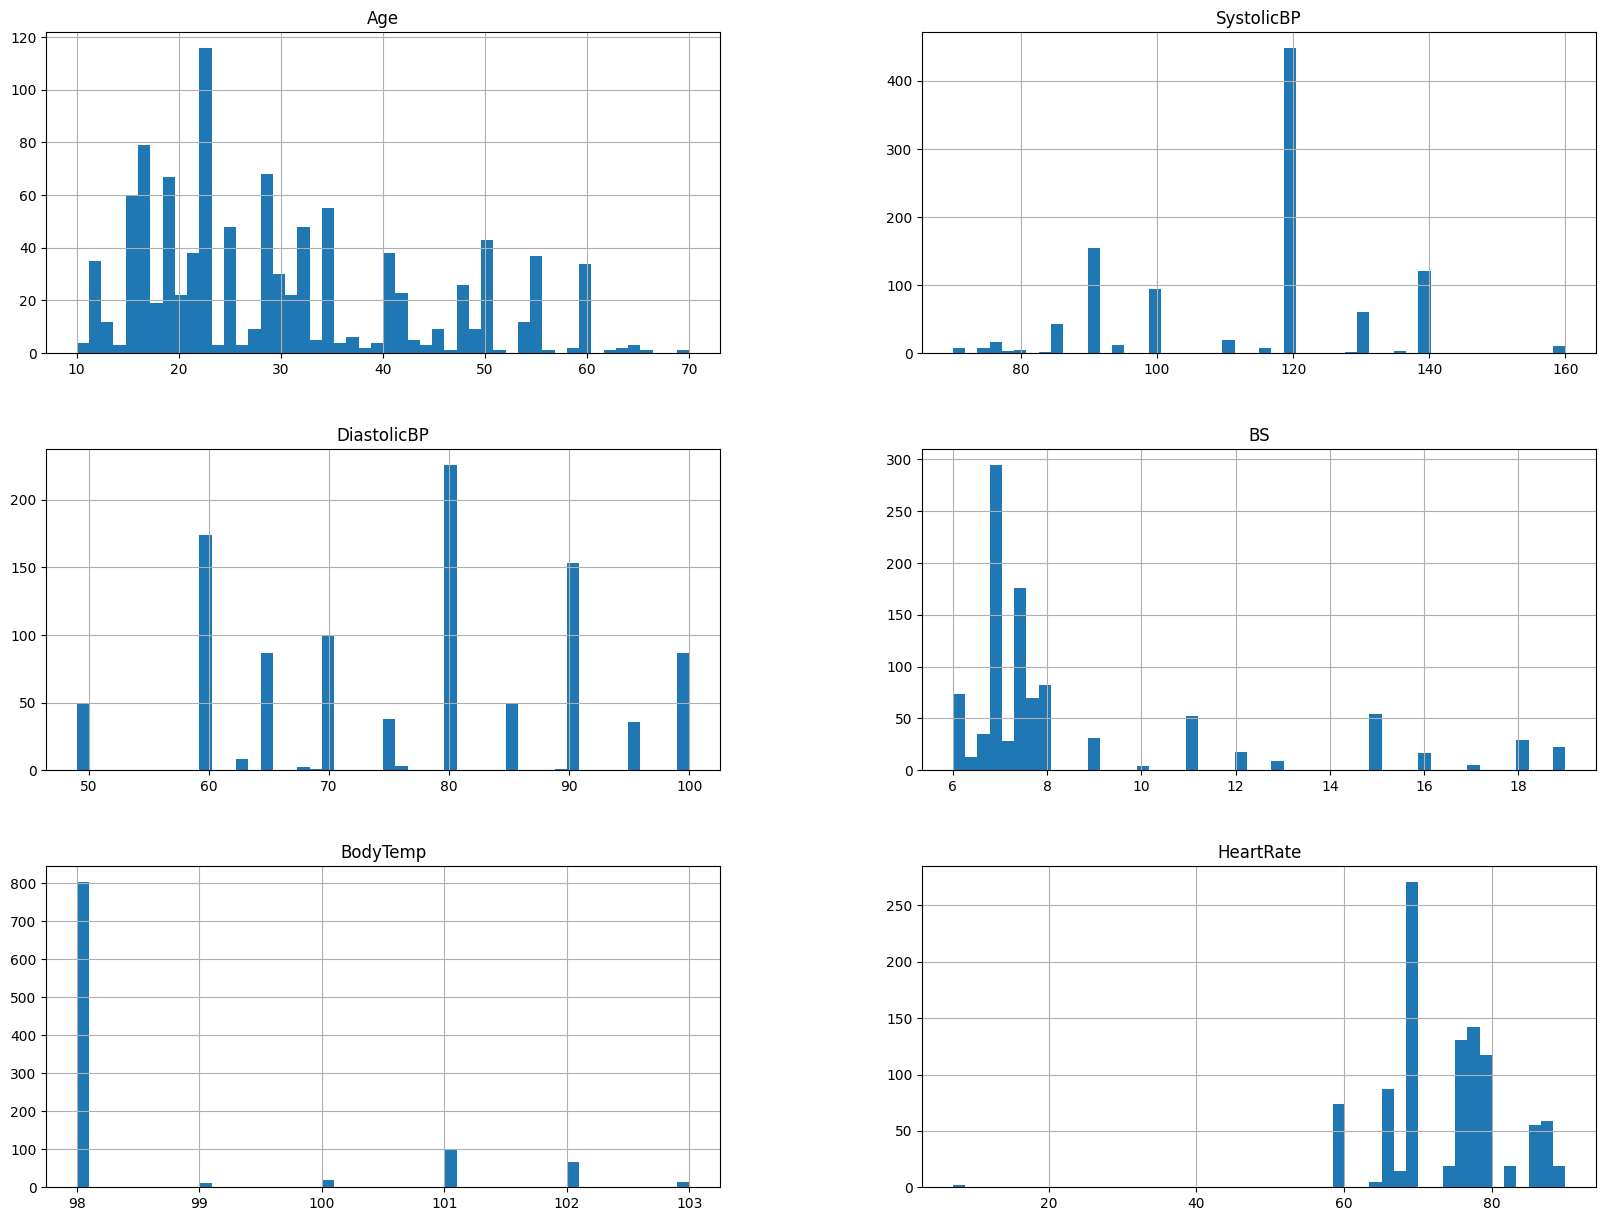

In [20]:
df.hist(bins=50, figsize=(20,15))  # Membuat histogram untuk semua kolom numerik di DataFrame dengan 50 bin dan ukuran figure besar
plt.show()  # Menampilkan plot

## Multivariate Analysis

Multivariate visualization merupakan jenis visualisasi data untuk menggambarkan informasi yang terdapat dalam lebih dari dua variabel. Jenis visualisasi ini digunakan untuk merepresentasikan hubungan dan pola yang terdapat dalam multidimensional data.  

###Data Kategori

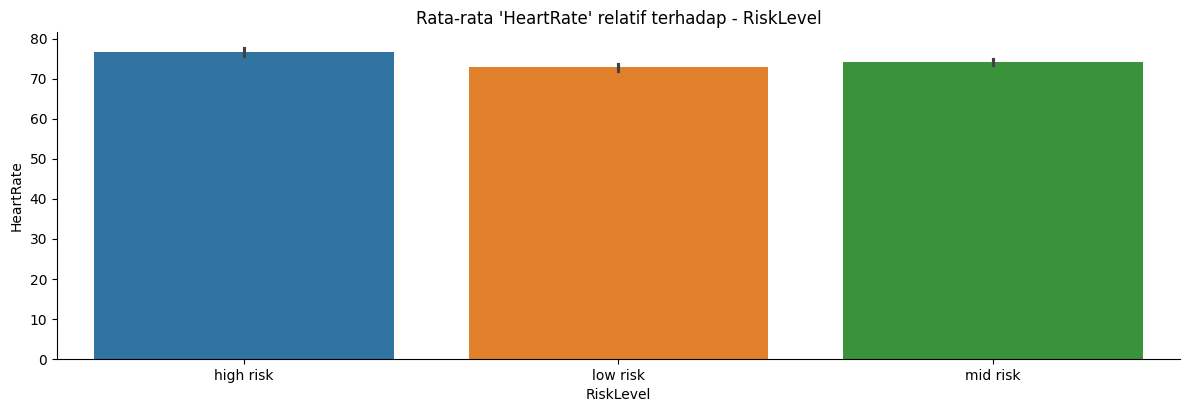

In [21]:
# Membuat barplot rata-rata HeartRate berdasarkan setiap fitur kategorikal dalam DataFrame

cat_features = df.select_dtypes(include='object').columns.to_list()  # Mengambil semua kolom kategorikal (tipe object) dalam bentuk list

for col in cat_features:  # Iterasi setiap kolom kategorikal
    sns.catplot(
        x=col,  # Menampilkan nilai unik dari kolom kategori di sumbu x
        y='HeartRate',  # Menghitung rata-rata HeartRate di sumbu y
        kind="bar",  # Jenis plot adalah bar chart
        dodge=False,  # Tidak memisahkan posisi bar berdasarkan hue
        height=4,  # Tinggi gambar
        aspect=3,  # Lebar gambar (rasio 3:1)
        data=df,  # Dataset yang digunakan
        hue=col,  # Pewarnaan berdasarkan kategori yang sama dengan x
        legend=False  # Menyembunyikan legenda karena hue dan x sama
    )
    plt.title("Rata-rata 'HeartRate' relatif terhadap - {}".format(col))  # Memberi judul pada plot


###Data Numerik

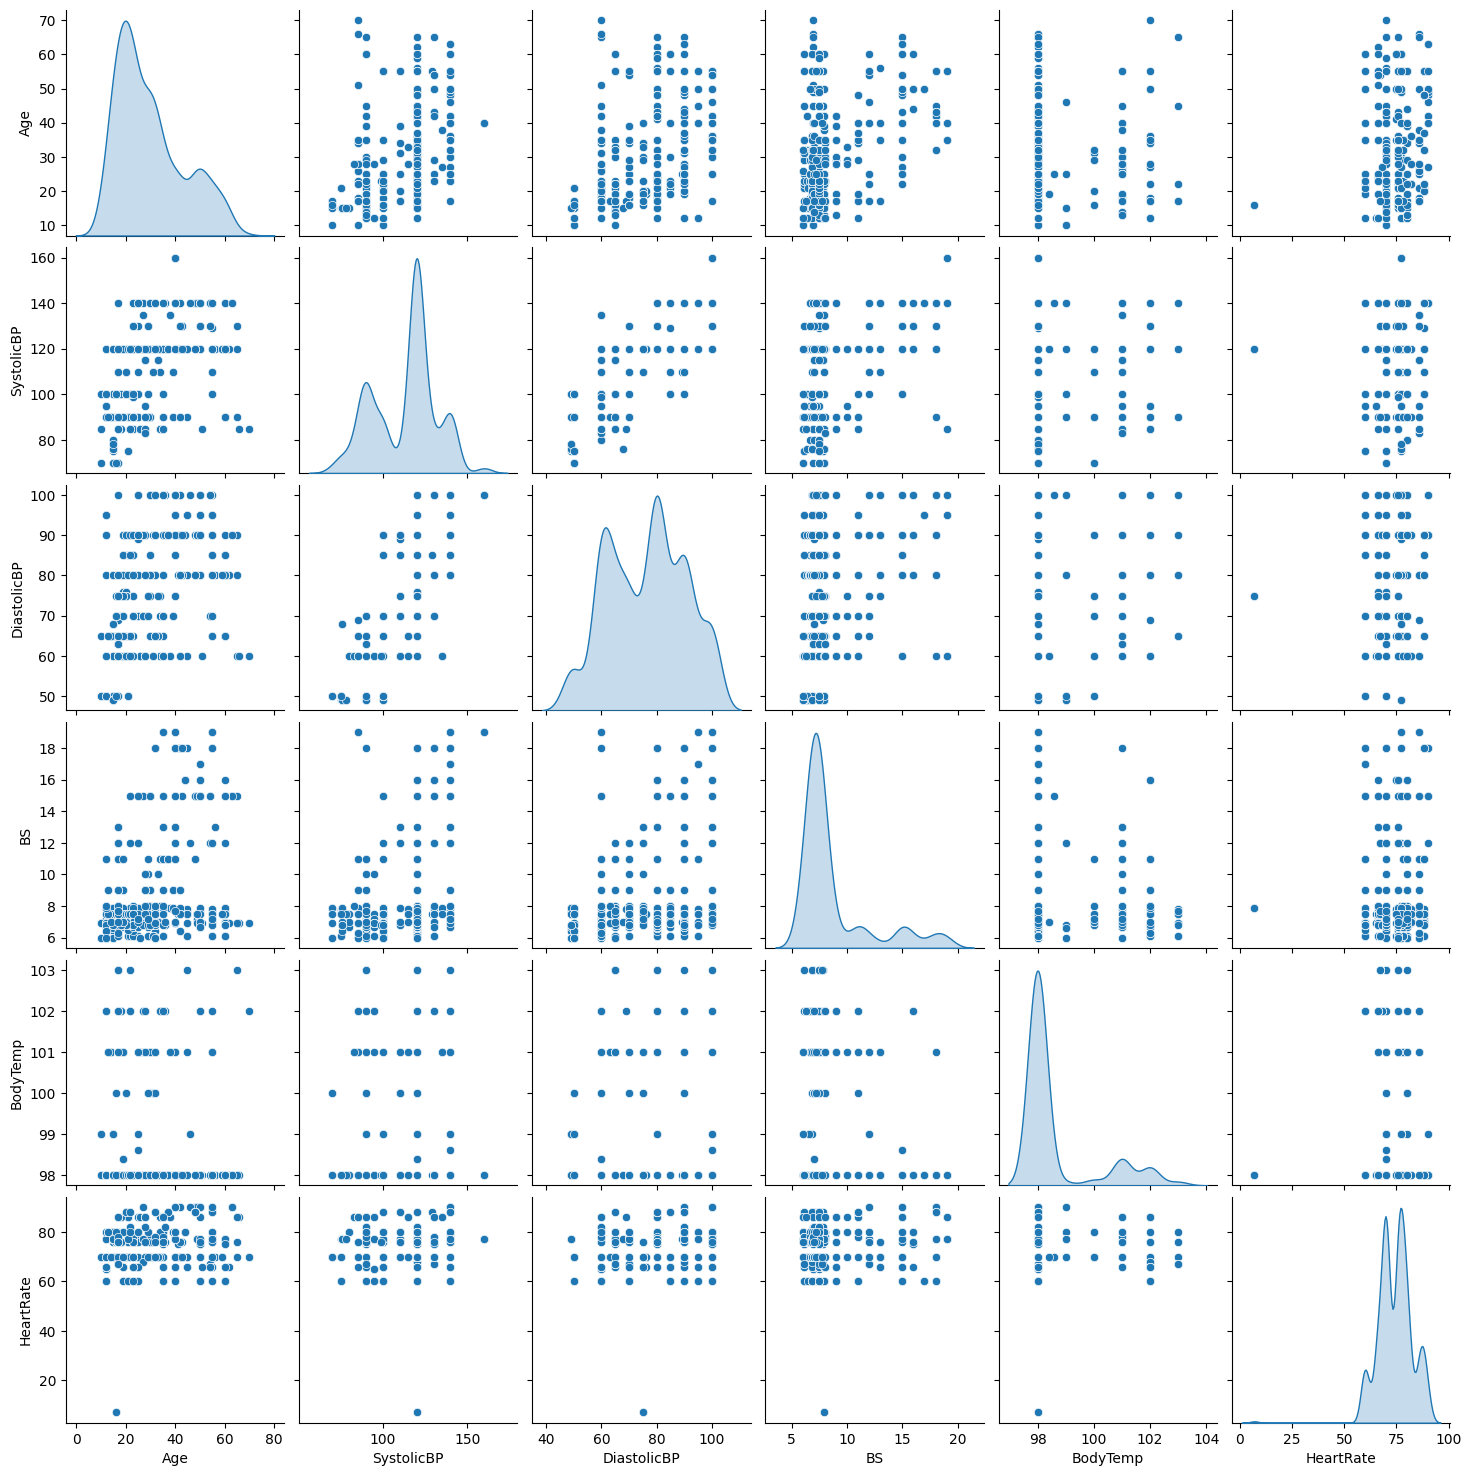

In [22]:
sns.pairplot(df, diag_kind='kde')  # Membuat plot pasangan (pairplot) antar semua fitur numerik di DataFrame dengan distribusi kernel density (KDE) di diagonal
plt.show()  # Menampilkan plot ke layar

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

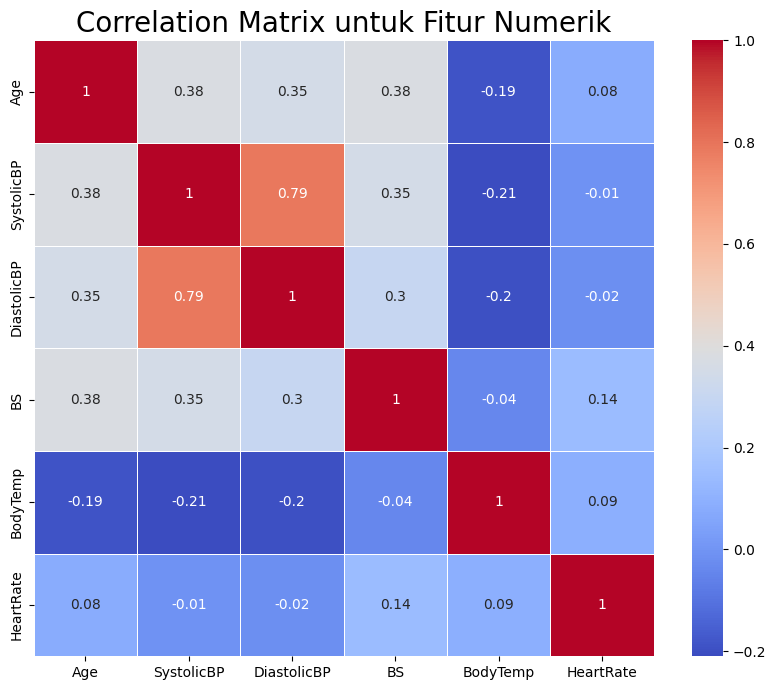

In [23]:
plt.figure(figsize=(10, 8))  # Mengatur ukuran figure heatmap

correlation_matrix = df1.corr().round(2)  # Menghitung korelasi antar fitur numerik dan membulatkan ke 2 desimal

sns.heatmap(
    data=correlation_matrix,  # Data korelasi yang digunakan
    annot=True,               # Menampilkan nilai korelasi di setiap kotak
    cmap='coolwarm',          # Skema warna: biru ke merah untuk menunjukkan -1 sampai +1
    linewidths=0.5            # Jarak antar sel (kotak)
)

plt.title("Correlation Matrix untuk Fitur Numerik", size=20)  # Judul heatmap


# **Data Preparation**

Data Peparation merupakan tahapan penting dalam proses pengembangan model machine learning. Pada tahap ini lakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahapan yang umum dilakukan pada data preparation, antara lain, seleksi fitur, transformasi data, feature engineering, dan dimensionality reduction.

Pada bagian ini lakukan empat tahap persiapan data, yaitu:
- Encoding fitur kategori.
- Reduksi dimensi dengan Principal Component Analysis (PCA).
- Pembagian dataset dengan fungsi train_test_split dari library sklearn.
- Standarisasi.

## Encoding

Untuk melakukan proses encoding fitur kategori, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding.  Lakukan proses encoding ini dengan fitur get_dummies.

In [24]:
# Mengubah kolom kategorikal 'RiskLevel' menjadi kolom dummy variables dan menghapus kolom aslinya
df = pd.concat([df, pd.get_dummies(df['RiskLevel'], prefix='RiskLevel')], axis=1)  # Menambahkan dummy variables untuk 'RiskLevel'
df.drop(['RiskLevel'], axis=1, inplace=True)  # Menghapus kolom 'RiskLevel' asli setelah dummy variables dibuat

df.head()  # Menampilkan 5 baris pertama dari DataFrame setelah perubahan


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk
0,25,130,80,15.0,98.0,86,True,False,False
1,35,140,90,13.0,98.0,70,True,False,False
2,29,90,70,8.0,100.0,80,True,False,False
3,30,140,85,7.0,98.0,70,True,False,False
4,35,120,60,6.1,98.0,76,False,True,False


##Reduksi Dimensi dengan PCA

Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA.

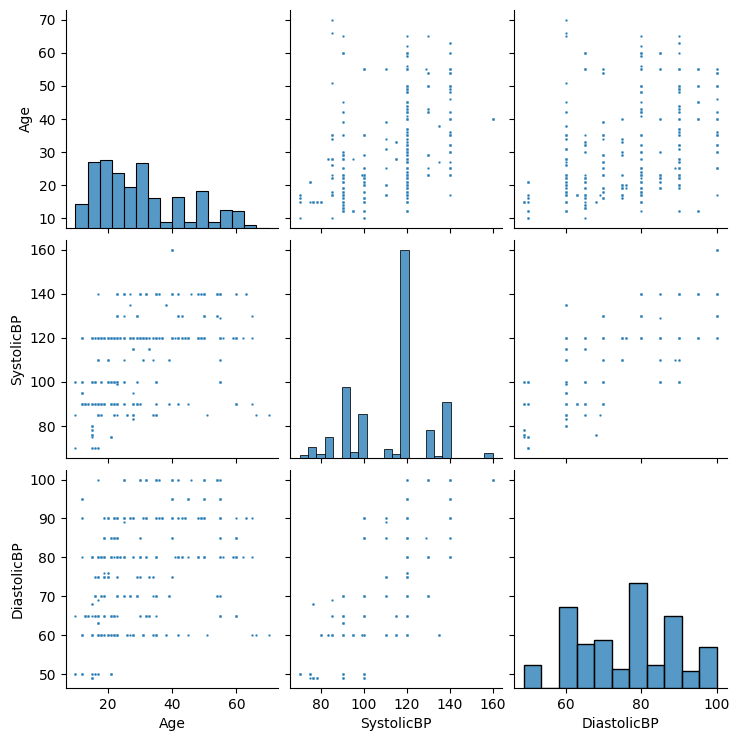

In [25]:
 # Membuat pairplot (scatterplot matriks) untuk fitur 'Age', 'SystolicBP', dan 'DiastolicBP'.
# 'plot_kws={"s": 3}' mengatur ukuran marker (titik) menjadi 3, sehingga titik-titiknya lebih kecil.
sns.pairplot(df[['Age', 'SystolicBP', 'DiastolicBP']], plot_kws={"s": 3});

In [26]:
pca = PCA(n_components=3, random_state=123)  # Membuat objek PCA untuk mereduksi dimensi data menjadi 3 komponen utama
                                              # 'random_state=123' memastikan hasil yang konsisten

pca.fit(df[['Age', 'SystolicBP', 'DiastolicBP']])  # Melatih PCA pada data kolom 'Age', 'SystolicBP', dan 'DiastolicBP'

princ_comp = pca.transform(df[['Age', 'SystolicBP', 'DiastolicBP']])  # Mentransformasikan data ke dalam komponen utama yang baru


In [27]:
pca.explained_variance_ratio_.round(3)  # Menampilkan rasio variansi yang dijelaskan oleh setiap komponen utama yang telah dihitung oleh PCA, dibulatkan hingga 3 desimal

array([0.739, 0.189, 0.073])

In [28]:
pca = PCA(n_components=1, random_state=123)  # Membuat objek PCA untuk mereduksi dimensi data menjadi 1 komponen utama
                                              # 'random_state=123' memastikan hasil yang konsisten

pca.fit(df[['Age', 'SystolicBP', 'DiastolicBP']])  # Melatih PCA pada data kolom 'Age', 'SystolicBP', dan 'DiastolicBP'

df['Maternal Health Risk Data'] = pca.transform(df[['Age', 'SystolicBP', 'DiastolicBP']]).flatten()  # Mengubah data menjadi 1 komponen utama dan menambahkannya ke DataFrame
                                                                                                     # .flatten() digunakan untuk mengubah array 2D menjadi 1D

df.drop(['Age', 'SystolicBP', 'DiastolicBP'], axis=1, inplace=True)  # Menghapus kolom 'Age', 'SystolicBP', dan 'DiastolicBP' setelah PCA diterapkan

df.head()  # Menampilkan 5 baris pertama dari DataFrame setelah perubahan


,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk,Maternal Health Risk Data
0,15.0,98.0,86,True,False,False,13.120435
1,13.0,98.0,70,True,False,False,29.651719
2,8.0,100.0,80,True,False,False,-21.593291
3,7.0,98.0,70,True,False,False,25.223723
4,6.1,98.0,76,False,True,False,-1.888055


##Train-Test-Split

Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus diakukan sebelum membuat model. Hal ini diperlukan untuk menguji seberapa baik generalisasi model terhadap data baru.

In [29]:
X = df.drop(["HeartRate"], axis=1)  # Menghapus kolom 'HeartRate' dari DataFrame df untuk menjadi fitur (X) yang akan digunakan dalam model

y = df["HeartRate"]  # Menyimpan kolom 'HeartRate' sebagai target (y) yang akan diprediksi oleh model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)  # Membagi data menjadi data latih (90%) dan data uji (10%) dengan random_state=123 untuk hasil yang konsisten


In [30]:
print(f'Total # of sample in whole dataset: {len(X)}')  # Menampilkan total jumlah sampel dalam dataset asli (sebelum dibagi)

print(f'Total # of sample in train dataset: {len(X_train)}')  # Menampilkan total jumlah sampel dalam dataset latih (X_train)

print(f'Total # of sample in test dataset: {len(X_test)}')  # Menampilkan total jumlah sampel dalam dataset uji (X_test)


Total # of sample in whole dataset: 1014
Total # of sample in train dataset: 912
Total # of sample in test dataset: 102


In [31]:
print(X_train.columns)  # Menampilkan nama-nama kolom (fitur) yang ada dalam dataset latih (X_train)


Index(['BS', 'BodyTemp', 'RiskLevel_high risk', 'RiskLevel_low risk',
       'RiskLevel_mid risk', 'Maternal Health Risk Data'],
      dtype='object')


##Standarisasi

Algoritma machine learning memiliki performa lebih baik dan lebih cepat ketika dimodelkan pada data dengan yang mendekati distribusi normal. Scaling dan standarisasi merupakan metode yang dapat dilakukan untuk fitur numerik, tidak dilakukan proses transformasi dengan one-hot-encoding seperti pada fitur kategori. Yang digunakan untuk standarisasi adalah StandarScaler. StandardScaler merupakan proses standarisasi fitur dengan mengurangkan mean kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  

In [32]:
numerical_features = ['BS', 'BodyTemp']  # Menentukan fitur numerik yang akan distandarisasi (kolom 'BS' dan 'BodyTemp')

scaler = StandardScaler()  # Membuat objek StandardScaler untuk standarisasi fitur numerik

scaler.fit(X_train[numerical_features])  # Melatih scaler pada dataset latih (X_train) untuk fitur numerik yang ditentukan

X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])  # Mentransformasikan data latih dengan menggunakan scaler yang telah dilatih

X_train[numerical_features].head()  # Menampilkan 5 baris pertama dari fitur numerik yang sudah distandarisasi


,BS,BodyTemp
387,-0.793028,-0.485232
505,-0.242783,-0.485232
182,3.150391,-0.485232
485,-0.242783,-0.485232
156,-0.365060,-0.485232


In [33]:
X_train[numerical_features].describe().round(2)  # Menampilkan statistik deskriptif (seperti mean, std, min, max) untuk fitur numerik yang telah distandarisasi di X_train
                                                # .round(2) digunakan untuk membulatkan nilai statistik deskriptif hingga 2 desimal


,BS,BodyTemp
count,912.00,912.00
mean,0.00,0.00
std,1.00,1.00
min,-0.82,-0.49
25%,-0.55,-0.49
50%,-0.37,-0.49
75%,-0.21,-0.49
max,3.15,3.16


# **Model Development**

Model development adalah tahapan dimana digunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding
Pada tahap ini, dibuat model machine learning dengan tiga algoritma. Kemudian, evaluasi performa masing-masing algoritma dan pilih algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan digunakan, antara lain:
1. K-Nearest Neighbor
2. Random Forest
3. Boosting Algorithm

In [34]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],  # Menentukan indeks untuk menyimpan Mean Squared Error (MSE) pada data latih dan data uji
                      columns=['KNN', 'RandomForest', 'Boosting'])  # Menentukan kolom untuk menyimpan hasil MSE dari tiga model: KNN, RandomForest, dan Boosting


## K-Nearest Neighbor

In [35]:
knn = KNeighborsRegressor(n_neighbors=10)  # Membuat objek KNeighborsRegressor dengan jumlah tetangga (n_neighbors) yang digunakan sebanyak 10

knn.fit(X_train, y_train)  # Melatih model KNN pada dataset latih (X_train dan y_train)

y_pred_knn = knn.predict(X_train)  # Membuat prediksi menggunakan model KNN pada dataset latih (X_train)


## Random Forest

In [36]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)  # Membuat objek RandomForestRegressor dengan 50 estimator (pohon keputusan), kedalaman maksimum 16, dan penggunaan random_state untuk hasil yang konsisten
                                                              # n_jobs=-1 memungkinkan penggunaan semua core CPU untuk pelatihan paralel

RF.fit(X_train, y_train)  # Melatih model RandomForest pada data latih (X_train dan y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)  # Menghitung dan menyimpan Mean Squared Error (MSE) pada data latih untuk model RandomForest


## Boosting Algorithm

In [37]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)  # Membuat objek AdaBoostRegressor dengan learning rate 0.05 dan random_state untuk hasil yang konsisten

boosting.fit(X_train, y_train)  # Melatih model AdaBoost pada data latih (X_train dan y_train)

models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)  # Menghitung dan menyimpan Mean Squared Error (MSE) pada data latih untuk model Boosting


# Evaluasi Model

##Mengukur seberapa kecil nilai error MSE

In [38]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])  # Membuat DataFrame kosong untuk menyimpan MSE pada data latih (train) dan uji (test) untuk setiap model (KNN, RF, Boosting)

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}  # Menyimpan model-model yang telah dilatih dalam dictionary untuk iterasi

# Menghitung MSE untuk setiap model pada data latih dan data uji
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3  # MSE untuk data latih dibagi 1000 untuk skalabilitas
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3  # MSE untuk data uji dibagi 1000 untuk skalabilitas

mse  # Menampilkan DataFrame mse yang berisi MSE pada data latih dan data uji untuk setiap model


,train,test
KNN,0.030923,0.106557
RF,0.003346,0.103572
Boosting,0.050693,0.091678


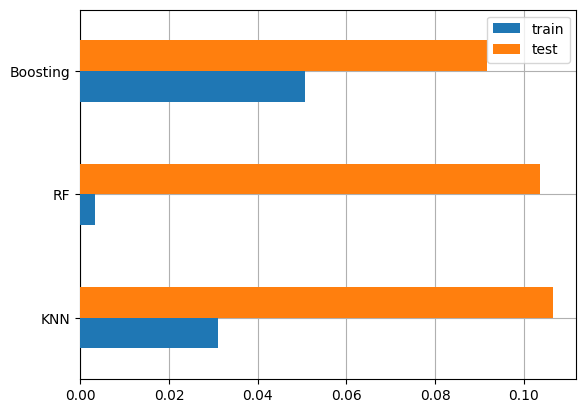

In [39]:
fig, ax = plt.subplots()  # Membuat figure dan axis untuk plot horizontal

# Mengurutkan DataFrame mse berdasarkan nilai MSE pada data uji ('test') secara menurun (ascending=False) dan membuat plot horizontal
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)

ax.grid(zorder=0)  # Menambahkan grid di belakang grafik dengan zorder=0 untuk memastikan grid berada di bawah plot


Dari gambar di atas, terlihat bahwa, model Boosting memberikan nilai eror yang paling kecil.

In [40]:
prediksi = X_test.iloc[:1].copy()  # Menyalin satu baris pertama dari data uji (X_test) untuk prediksi

pred_dict = {'y_true': y_test[:1]}  # Membuat dictionary untuk menyimpan nilai sebenarnya (y_true) untuk data uji pertama

# Melakukan prediksi untuk setiap model dan menyimpannya dalam dictionary
for name, model in model_dict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)  # Melakukan prediksi dan membulatkan hasil prediksi ke 1 desimal

pd.DataFrame(pred_dict)  # Mengonversi dictionary pred_dict ke dalam DataFrame untuk menampilkan hasil prediksi


,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
50,66,75.4,75.5,73.8


Ketiga model (KNN, RF, dan Boosting) memberikan prediksi sekitar 73–76, jauh lebih tinggi dari nilai aktual (50), menunjukkan overestimasi yang signifikan. Performa ketiganya relatif mirip.